In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import geopandas as gpd
import difflib

In [2]:
df= pd.read_csv('Entrenamieto_ECI_2020.csv')
df.head(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [3]:
df['Planned_Delivery_End_Date']=pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Planned_Delivery_Start_Date']=pd.to_datetime(df['Planned_Delivery_Start_Date'])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  object        
 10  Source                

In [5]:
df.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Submitted_for_Approval                         int64
Bureaucratic_Code                             object
Account_Created_Date                          object
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  

In [6]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [7]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

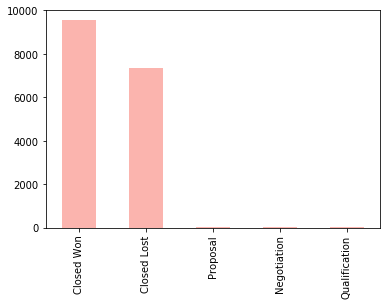

In [8]:
df['Stage'].value_counts().plot(kind='bar', colormap='Pastel1')

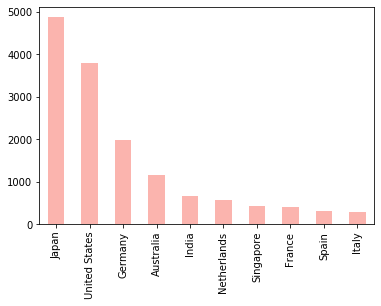

In [9]:
df['Billing_Country'].value_counts().nlargest(10).plot(kind='bar', colormap='Pastel1')

In [10]:
df['Opportunity_ID'].nunique()

9841

In [11]:
#Duracion de las oportunidades
df_duracion = df[['Opportunity_ID','Opportunity_Name','Planned_Delivery_Start_Date','Planned_Delivery_End_Date','Delivery_Quarter','Total_Amount','Territory','Stage']]
df_duracion.loc[df_duracion['Opportunity_ID'] == 12801]


,Opportunity_ID,Opportunity_Name,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Delivery_Quarter,Total_Amount,Territory,Stage
16942,12801,Opportunity_Name_9245,2016-03-21,2016-03-25,Q1,103350.0,Austria,Closed Won
16943,12801,Opportunity_Name_9245,2016-04-04,2016-04-08,Q2,93015.0,Austria,Closed Won
16944,12801,Opportunity_Name_9245,2016-03-28,2016-03-31,Q1,103350.0,Austria,Closed Won


In [12]:
#para la misma id_opportunity se ven diferentes fechas de comienzo y fin, 
#agrupo por id y me quedo con la fecha de comienzo mas chica y de fin mas grande como para calcular de la oportundad entera...
df_duracion_grouped = df_duracion.groupby('Opportunity_ID')\
    .agg({'Planned_Delivery_Start_Date':'min', 'Planned_Delivery_End_Date': 'max','Total_Amount':'sum', 'Territory':'first'})\
    .reset_index()
df_duracion_grouped.head(3)

,Opportunity_ID,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Total_Amount,Territory
0,0,2016-05-01,2016-06-30,5272800.0,None
1,1,2016-01-18,2016-01-20,48230.0,None
2,2,2016-01-25,2016-01-25,83865.6,NW America


In [13]:
#calculo la duracion del proyecto en dias
df_duracion_grouped['Opportunity_duration'] = df_duracion_grouped['Planned_Delivery_End_Date'] - df_duracion_grouped['Planned_Delivery_Start_Date']
#agrego la duracion en meses y redondeo hacia arriba
df_duracion_grouped['Opportunity_duration_months'] = ((df_duracion_grouped['Planned_Delivery_End_Date'] - df_duracion_grouped['Planned_Delivery_Start_Date'])/np.timedelta64(1, 'M'))
df_duracion_grouped['Opportunity_duration_months'] = np.ceil(df_duracion_grouped['Opportunity_duration_months'])
#los diez proyectos de ventas mas largos
df_duracion_grouped.nlargest(10,'Opportunity_duration')

,Opportunity_ID,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Total_Amount,Territory,Opportunity_duration,Opportunity_duration_months
8914,9773,2018-10-14,2208-12-31,290713.5,Netherlands,69474 days,2283.0
4114,4283,2017-08-01,2020-08-07,1887900.0,NW America,1102 days,37.0
3936,4096,2017-07-10,2019-07-10,5702850.0,NE America,730 days,24.0
4835,5026,2019-01-07,2020-06-30,35105000.0,Kazakhstan,540 days,18.0
3721,3869,2016-12-01,2018-04-30,16983000.0,Vietnam,515 days,17.0
5062,5263,2018-02-05,2019-06-28,9808074.0,NE America,508 days,17.0
1833,1919,2017-04-01,2018-06-30,9151720.2,NW America,455 days,15.0
2434,2536,2017-01-02,2018-03-30,16314480.0,NE America,452 days,15.0
1042,1112,2016-03-07,2017-05-01,4893277.5,NE America,420 days,14.0
2448,2551,2016-11-08,2017-12-28,759000.0,Netherlands,415 days,14.0


In [14]:
#se ve que la fecha de esta oportunidad no tiene sentido... elimino este registro
indexNames = df_duracion_grouped[df_duracion_grouped['Opportunity_ID'] == 9773].index
df_duracion_grouped.drop(indexNames , inplace=True)

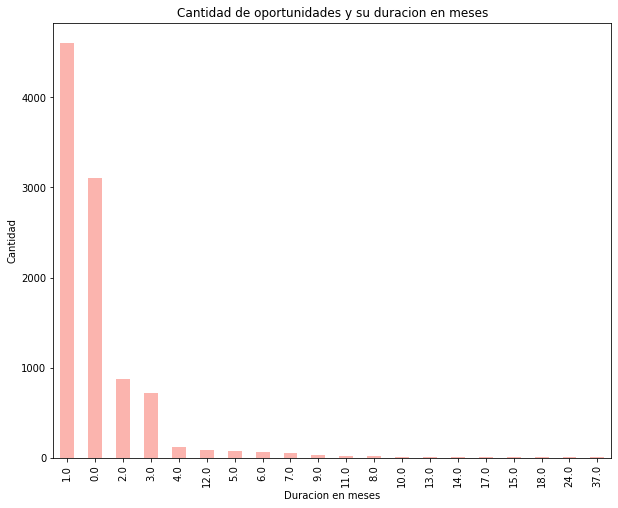

In [15]:
#este grafico no me gusta, debe haber algo mejor para representar esto
df_duracion_grouped['Opportunity_duration_months'].value_counts()\
    .plot.bar(colormap='Pastel1', title='Cantidad de oportunidades y su duracion en meses',figsize=(10,8))

plt.ylabel('Cantidad')
plt.xlabel('Duracion en meses')

plt.show()

In [16]:
df_duracion_grouped_territorio= df_duracion_grouped.groupby('Territory').agg({'Opportunity_duration_months':['mean','count']})
df_duracion_grouped_territorio=df_duracion_grouped_territorio.loc[df_duracion_grouped_territorio[('Opportunity_duration_months','count')]>100,:].reset_index()
df_duracion_grouped_territorio.columns=['Territory','Duration_months_mean','Duration_months_count']
df_duracion_grouped_territorio
#dibujar en mapa cuando me funcione geopandas

,Territory,Duration_months_mean,Duration_months_count
0,Australia,1.647788,565
1,Belgium,0.955307,179
2,Central US,1.096552,145
3,France,1.185751,393
4,Germany,1.494403,1072
5,India,1.316024,674
6,Indonesia,0.822695,141
7,Italy,1.053398,206
8,Japan,0.300826,605
9,NE America,1.313346,517


In [17]:
#capaz los valores se ven mejor en dias para hacer el mapa
df_duracion_grouped['Opportunity_duration']= pd.to_numeric(df_duracion_grouped['Opportunity_duration'].dt.days, downcast='integer')
df_duracion_grouped_territorio2= df_duracion_grouped.groupby('Territory').agg({'Opportunity_duration':['mean','count']})
df_duracion_grouped_territorio2=df_duracion_grouped_territorio2.loc[df_duracion_grouped_territorio2[('Opportunity_duration','count')]>100,:].reset_index()
df_duracion_grouped_territorio2.columns=['Territory','Duration_mean','Duration_count']
df_duracion_grouped_territorio2

,Territory,Duration_mean,Duration_count
0,Australia,34.713274,565
1,Belgium,20.178771,179
2,Central US,18.317241,145
3,France,27.104326,393
4,Germany,30.004664,1072
5,India,28.136499,674
6,Indonesia,12.737589,141
7,Italy,10.242718,206
8,Japan,6.373554,605
9,NE America,31.137331,517


In [18]:
#oportunidades y su codigo de aprobacion
df[['Opportunity_ID','Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Submitted_for_Approval','Bureaucratic_Code','Stage']].head(3)

,Opportunity_ID,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Stage
0,0,1,1,0,Bureaucratic_Code_4,Closed Lost
1,1,0,0,0,Bureaucratic_Code_4,Closed Won
2,2,0,0,0,Bureaucratic_Code_4,Closed Won


In [19]:
bureauctratic_codes= df.groupby(['Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved'])['Stage'].value_counts().to_frame()
bureauctratic_codes = bureauctratic_codes.unstack()
bureauctratic_codes.columns= ['Closed Lost','Closed Won','Negotiation', 'Proposal','Qualification']
bureauctratic_codes = bureauctratic_codes.reset_index()
bureauctratic_codes = bureauctratic_codes.fillna(0)
#0 si no se necesito ni aprobo
#1 si se necesito y aprobo
#2 si se necesito y no se aprobo
conditions = [
    ((bureauctratic_codes['Bureaucratic_Code_0_Approval']) == 0 & (bureauctratic_codes['Bureaucratic_Code_0_Approved'] == 0)),
    ((bureauctratic_codes['Bureaucratic_Code_0_Approval']) == 1 & (bureauctratic_codes['Bureaucratic_Code_0_Approved'] == 0)),
    ((bureauctratic_codes['Bureaucratic_Code_0_Approval']) == 1 & (bureauctratic_codes['Bureaucratic_Code_0_Approved'] == 1)),
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
bureauctratic_codes['Bureauctratic_code'] = np.select(conditions, values)
bureauctratic_codes['Total_opportunities'] =  bureauctratic_codes['Closed Lost'] + bureauctratic_codes['Closed Won']\
+ bureauctratic_codes['Negotiation'] + bureauctratic_codes['Proposal'] + bureauctratic_codes['Qualification'] 
bureauctratic_codes

,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Bureauctratic_code,Total_opportunities
0,0,0,2961.0,5928.0,0.0,0.0,0.0,0,8889.0
1,1,0,1846.0,787.0,1.0,9.0,11.0,1,2654.0
2,1,1,2543.0,2818.0,17.0,26.0,0.0,2,5404.0


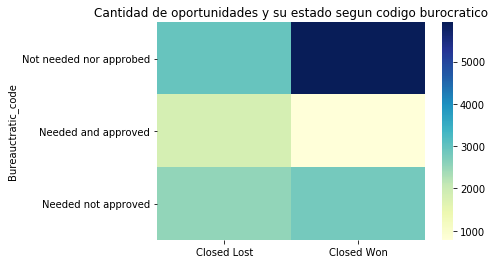

In [20]:
heatmap_data = bureauctratic_codes.set_index('Bureauctratic_code').loc[:,['Closed Lost','Closed Won']]
x_axis_labels = ['Closed Lost','Closed Won'] 
y_axis_labels = ['Not needed nor approbed','Needed and approved','Needed not approved'] 
ax = plt.axes()
sns.heatmap(heatmap_data, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap="YlGnBu", ax = ax)
ax.set_title('Cantidad de oportunidades y su estado segun codigo burocratico')
plt.show()

In [21]:
#vendedores y sus oporntunidades
vendedores = df.groupby('Account_Owner')['Stage'].value_counts().to_frame()
vendedores =vendedores.unstack()
vendedores.columns = ['Closed Lost','Closed Won','Negotiation','Proposal','Qualification']
vendedores =vendedores.fillna(0)

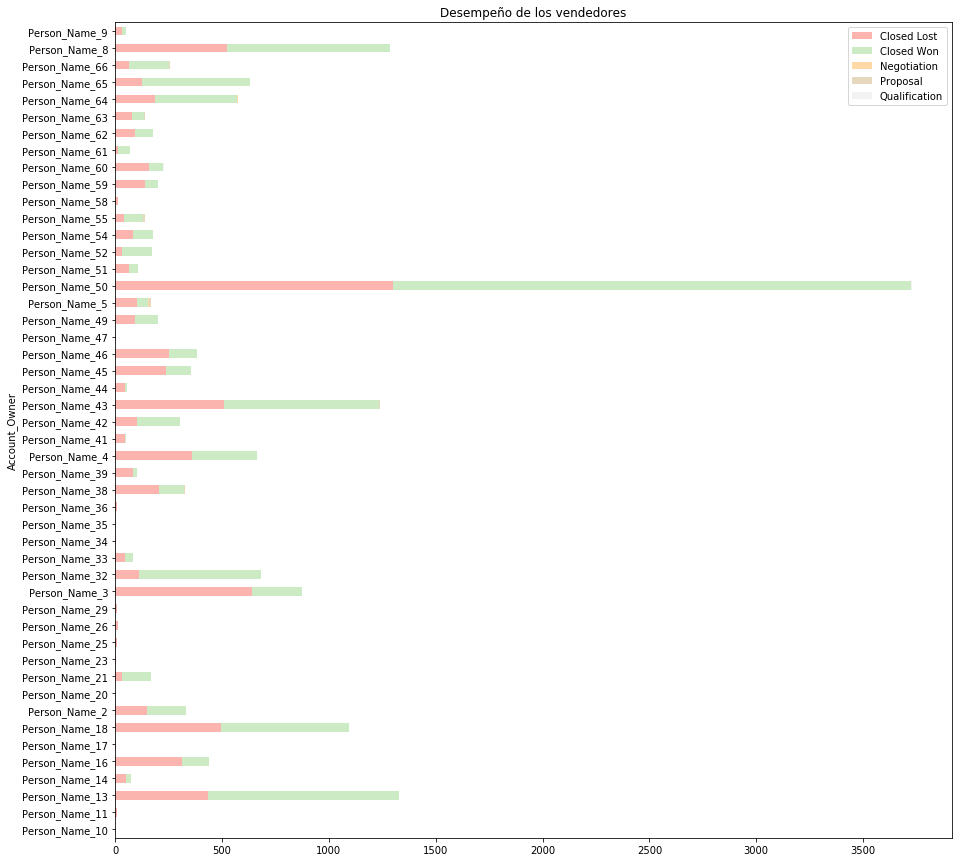

In [26]:
#vendedores, cuantas oportunidades cerraron, perdieron,...
#el vendedor 50 tiene demasiadosss y no deja que se vea bien el resto
vendedores.plot.barh(stacked = True, colormap='Pastel1', title='Desempeño de los vendedores',figsize =(15,15))

In [23]:
#vendedores normalizado y sus oporntunidades
vendedores2 = df.groupby('Account_Owner')['Stage'].value_counts(normalize = True).to_frame()
vendedores2 =vendedores2.unstack()
vendedores2.columns = ['Closed Lost','Closed Won','Negotiation','Proposal','Qualification']
vendedores2 =vendedores2.fillna(0)

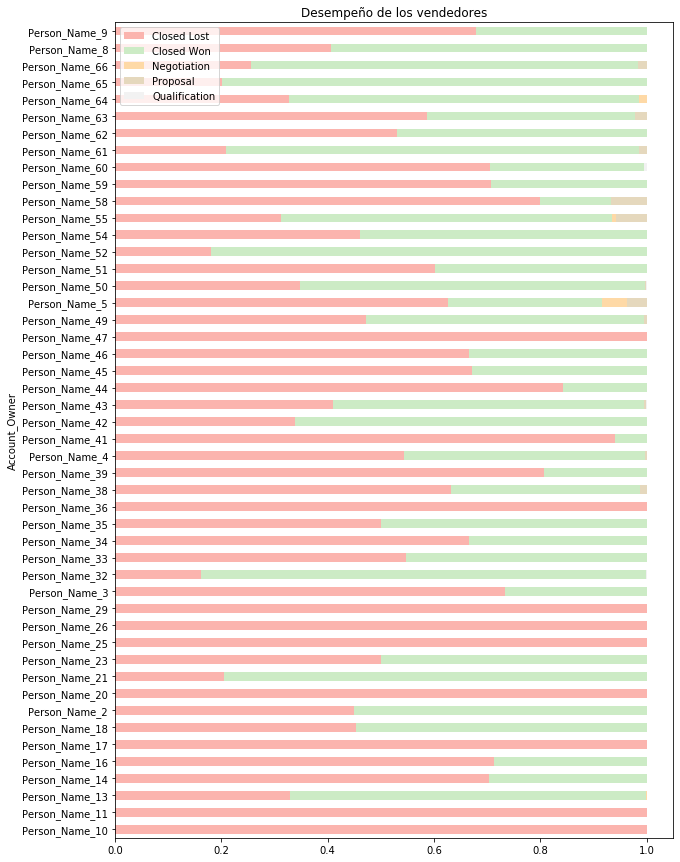

In [24]:
#vendedores normalizado, cuantas oportunidades cerraron, perdieron,...
vendedores2.plot.barh(stacked = True, colormap='Pastel1', title='Desempeño de los vendedores',figsize =(10,15))

In [25]:
#vendedores y el valor recaudado por cada uno de ellos
vendedores_total_facturado = df.groupby('Account_Owner').agg({'Total_Amount': 'sum','Total_Taxable_Amount':'sum'})
vendedores_total_facturado.head(3)

,Total_Amount,Total_Taxable_Amount
Account_Owner,,
Person_Name_10,2.880198e+07,2.880198e+07
Person_Name_11,1.652916e+07,4.212600e+05
Person_Name_13,1.170181e+09,2.363246e+09
